# 'data/structral/airport/train.in'

In [1]:
N = [90, 80, 70, 60, 50, 40, 30, 20, 10]
auc_sfdp_default = [0.90, 0.92, 0.93, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95]
auc_NMF = [0.87, 0.92, 0.93, 0.95, 0.96, 0.96, 0.96, 0.97, 0.97]
auc_SVDS = [0.68, 0.77, 0.83, 0.87, 0.90, 0.92, 0.93, 0.95, 0.95]

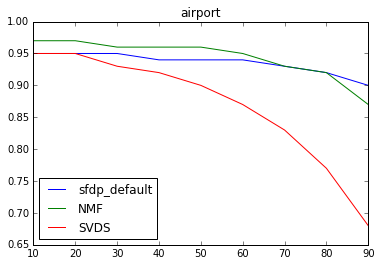

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(N, auc_sfdp_default, label='sfdp_default')
plt.plot(N, auc_NMF, label='NMF')
plt.plot(N, auc_SVDS, label='SVDS')

plt.legend(loc=3)
plt.title('airport')
plt.show()

# data/structral/EuroSiS/train.in

In [7]:
N = [90, 80, 70, 60, 50, 40, 30, 20, 10]
auc_sfdp_default = [0.68, 0.78, 0.83, 0.86, 0.86, 0.88, 0.89, 0.90, 0.91]
auc_NMF = [0.64, 0.77, 0.83, 0.87, 0.88, 0.89, 0.91, 0.91, 0.92]
auc_SVDS = [0.53, 0.64, 0.73, 0.78, 0.81, 0.83, 0.86, 0.88, 0.88]

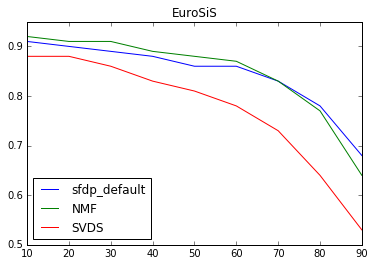

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(N, auc_sfdp_default, label='sfdp_default')
plt.plot(N, auc_NMF, label='NMF')
plt.plot(N, auc_SVDS, label='SVDS')

plt.legend(loc=3)
plt.title('EuroSiS')
plt.show()

# data/structral/PowerGrid/train.in

In [5]:
def extract_auc(line, name, auc_list, N):
    index = line.find(name)
    if index >= 0:
        l = len(name)
        auc = float(line[index+l: index+l+8])
        
        index = line.find('(+/- ')
        l = len('(+/- ')
        auc_var = float(line[index+l: index+l+8])
        
        auc_list[N/10] = [auc, auc_var]

def extract_data(logs_file, is_line=False):
    auc = {
        "auc_sfdp_default": [None for i in range(10)],
        "auc_NMF_10": [None for i in range(10)],
        "auc_NMF_30": [None for i in range(10)],
        "auc_SVDS_10": [None for i in range(10)],
        "auc_SVDS_30": [None for i in range(10)],
        "auc_PA": [None for i in range(10)],
        "auc_CN": [None for i in range(10)],
        "auc_AA": [None for i in range(10)],
        "auc_directed": [None for i in range(10)],
        "auc_bipartite": [None for i in range(10)],
    }
    N = None
    if not is_line:
        f = open(logs_file, 'r')
    else:
        f = [logs_file]
    for line in f:
        if 'N: ' in line:
            index = line.find('N: ')
            N = int(line[index+3: index+5])
        extract_auc(line, 'NMF-10 : ', auc["auc_NMF_10"], N)
        extract_auc(line, 'NMF-30 : ', auc["auc_NMF_30"], N)
        extract_auc(line, 'svds-10 : ', auc["auc_SVDS_10"], N)
        extract_auc(line, 'svds-30 : ', auc["auc_SVDS_30"], N)
        extract_auc(line, 'PA : ', auc["auc_PA"], N)
        extract_auc(line, 'CN : ', auc["auc_CN"], N)
        extract_auc(line, 'Adamic-Adar : ', auc["auc_AA"], N)
        extract_auc(line, 'sfdp-default : ', auc["auc_sfdp_default"], N)
        extract_auc(line, 'sfdp-directed : ', auc["auc_directed"], N)
        extract_auc(line, 'sfdp-bipartite : ', auc["auc_bipartite"], N)
    return auc

In [23]:
auc_power_grid = extract_data('PowerGrid_logs.txt')
auc_power_grid_1 = extract_data('PowerGrid_p1.txt')
auc_power_grid_3 = extract_data('PowerGridp3.txt')

In [6]:
def print_latex_line(auc, prec=2):
    return ' ' + str(round(auc[0], prec)) + "$\pm$" + str(round(auc[1], prec)) + ' '

def print_slice(k, auc):
    print 'NMF-10 : ', auc["auc_NMF_10"][k/10]
    print 'NMF-30 : ', auc["auc_NMF_30"][k/10]
    print 'svds-10 : ', auc["auc_SVDS_10"][k/10]
    print 'svds-30 : ', auc["auc_SVDS_30"][k/10]
    print 'PA : ', auc["auc_PA"][k/10]
    print 'CN : ', auc["auc_CN"][k/10]
    print 'Adamic-Adar : ', auc["auc_AA"][k/10]
    print 'sfdp-default : ', auc["auc_sfdp_default"][k/10]

In [27]:
def get_score(auc):
    return [x[0] for x in auc[1:]]

In [26]:
get_score(auc_power_grid["auc_sfdp_default"])

TypeError: 'NoneType' object has no attribute '__getitem__'

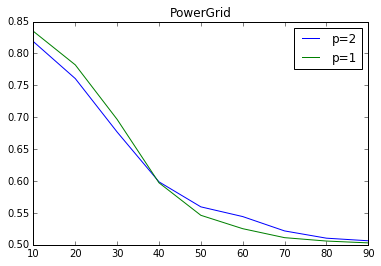

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_power_grid["auc_sfdp_default"]), label='p=2')

plt.plot(N, get_score(auc_power_grid_1["auc_sfdp_default"]), label='p=1')

plt.legend(loc=1)
plt.title('PowerGrid')
plt.show()

In [34]:
print_slice(10, auc_power_grid)

NMF-10 :  [0.582089, 0.060997]
NMF-30 :  [0.719775, 0.021708]
svds-10 :  [0.504663, 0.051659]
svds-30 :  [0.710715, 0.030794]
PA :  [0.449237, 0.013966]
CN :  [0.588496, 0.00871]
Adamic-Adar :  [0.588491, 0.008684]
sfdp-default :  [0.818545, 0.03296]


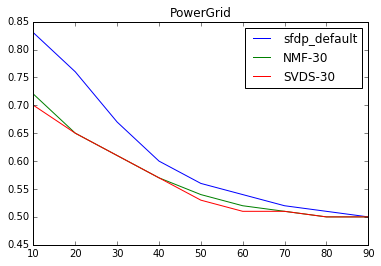

In [10]:
def get_score(auc):
    return [x[0] for x in auc if x]

%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_power_grid["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_power_grid["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_power_grid["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=1)
plt.title('PowerGrid')
plt.show()

# data/structral/euroroad/train.in

In [82]:
auc_euroroad = extract_data('Euroroad_logs.txt')
auc_euroroad_1 = extract_data('Euroroad_p_1.txt')
auc_euroroad_3 = extract_data('Euroroad-p3.txt')

In [63]:
print_slice(10, auc_euroroad)
print
print_slice(10, auc_euroroad_1)
print
print(auc_euroroad_3)

NMF-10 :  [0.640305, 0.057221]
NMF-30 :  [0.632013, 0.061334]
svds-10 :  [0.659021, 0.044813]
svds-30 :  [0.617187, 0.097395]
PA :  [0.336502, 0.045285]
CN :  [0.520925, 0.018342]
Adamic-Adar :  [0.520854, 0.018394]
sfdp-default :  [0.7496, 0.08085]

NMF-10 :  [0.646487, 0.054793]
NMF-30 :  [0.640365, 0.05324]
svds-10 :  [0.64834, 0.062464]
svds-30 :  [0.613136, 0.065543]
PA :  [0.322728, 0.054304]
CN :  [0.521988, 0.015468]
Adamic-Adar :  [0.521958, 0.015527]
sfdp-default :  [0.766923, 0.057005]

{'auc_directed': [None, None, None, None, None, None, None, None, None, None], 'auc_sfdp_default': [None, [0.695448, 0.058029], [0.658688, 0.036226], [0.60023, 0.033222], [0.553538, 0.02572], [0.532751, 0.014757], [0.513521, 0.028631], [0.511164, 0.018102], [0.510423, 0.017394], [0.496674, 0.022129]], 'auc_SVDS_10': [None, [0.638431, 0.064295], [0.608809, 0.056512], [0.565054, 0.042999], [0.522344, 0.030237], [0.508924, 0.026423], [0.498443, 0.027082], [0.505045, 0.019201], [0.502152, 0.01700

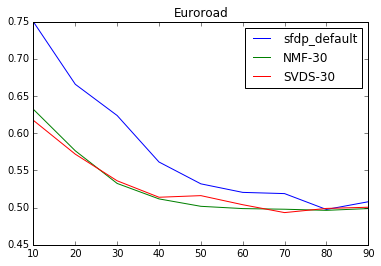

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_euroroad["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_euroroad["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_euroroad["auc_SVDS_30"]), label='SVDS-30')


plt.legend(loc=1)
plt.title('Euroroad')
plt.show()

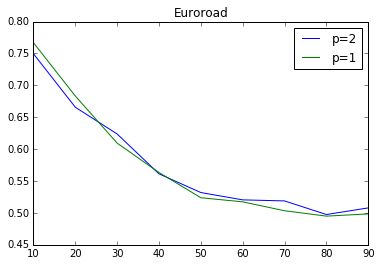

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_euroroad["auc_sfdp_default"]), label='p=2')

plt.plot(N, get_score(auc_euroroad_1["auc_sfdp_default"]), label='p=1')

plt.legend(loc=1)
plt.title('Euroroad')
plt.show()

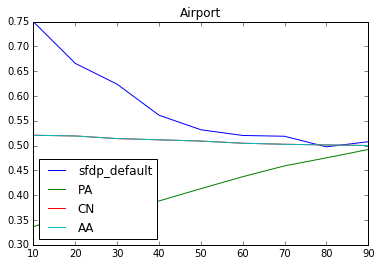

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_euroroad["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_euroroad["auc_PA"]), label='PA')
plt.plot(N, get_score(auc_euroroad["auc_CN"]), label='CN')
plt.plot(N, get_score(auc_euroroad["auc_AA"]), label='AA')

plt.legend(loc=3)
plt.title('Airport')
plt.show()

# data/structral/airport/train.in

In [57]:
auc_airport = extract_data('Airport_logs.txt')
auc_airport_1 = extract_data('Airport_p_1.txt')

In [41]:
print_slice(30, auc_airport)
print
print_slice(30, auc_airport_1)

NMF-10 :  [0.963597, 0.00377]
NMF-30 :  [0.965774, 0.003295]
svds-10 :  [0.957344, 0.00505]
svds-30 :  [0.935489, 0.005241]
PA :  [0.940868, 0.004904]
CN :  [0.958705, 0.004113]
Adamic-Adar :  [0.961441, 0.004034]
sfdp-default :  [0.942409, 0.003326]

NMF-10 :  [0.964762, 0.002542]
NMF-30 :  [0.965944, 0.004055]
svds-10 :  [0.958235, 0.004592]
svds-30 :  [0.935094, 0.005072]
PA :  [0.941666, 0.003047]
CN :  [0.95963, 0.002795]
Adamic-Adar :  [0.962393, 0.002608]
sfdp-default :  [0.94403, 0.003054]


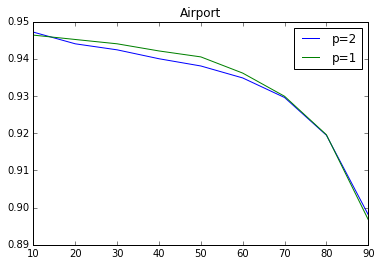

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_airport["auc_sfdp_default"]), label='p=2')

plt.plot(N, get_score(auc_airport_1["auc_sfdp_default"]), label='p=1')

plt.legend(loc=1)
plt.title('Airport')
plt.show()

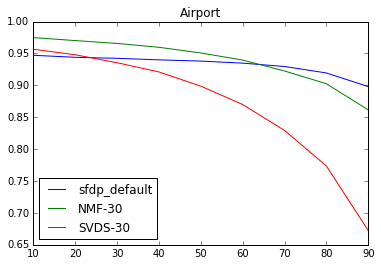

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_airport["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_airport["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_airport["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=3)
plt.title('Airport')
plt.show()

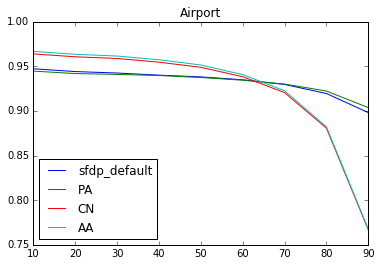

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_airport["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_airport["auc_PA"]), label='PA')
plt.plot(N, get_score(auc_airport["auc_CN"]), label='CN')
plt.plot(N, get_score(auc_airport["auc_AA"]), label='AA')

plt.legend(loc=3)
plt.title('Airport')
plt.show()

# Facebook

In [171]:
auc_facebook = extract_data('facebook_logs.txt')

In [172]:
print_slice(30, auc_facebook)

NMF-10 :  [0.91, 0.0]
NMF-30 :  [0.93, 0.0]
svds-10 :  [0.91, 0.0]
svds-30 :  [0.92, 0.0]
PA :  [0.88, 0.0]
CN :  [0.91, 0.0]
Adamic-Adar :  [0.91, 0.0]
sfdp-default :  [0.93, 0.0]


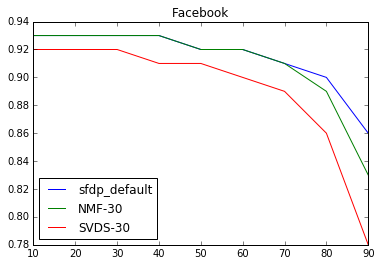

In [173]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_facebook["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_facebook["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_facebook["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=3)
plt.title('Facebook')
plt.show()

# Reactome

In [174]:
auc_reactome = extract_data('reactome_logs.txt')

In [175]:
print_slice(30, auc_reactome)

NMF-10 :  [0.95, 0.0]
NMF-30 :  [0.98, 0.0]
svds-10 :  [0.95, 0.0]
svds-30 :  [0.97, 0.0]
PA :  [0.9, 0.0]
CN :  [0.98, 0.0]
Adamic-Adar :  [0.99, 0.0]
sfdp-default :  [0.98, 0.0]


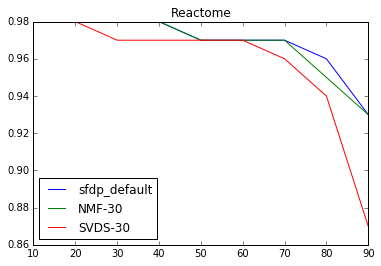

In [177]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_reactome["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_reactome["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_reactome["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=3)
plt.title('Reactome')
plt.show()

# Ca-HelpTh

In [14]:
auc_cacit = extract_data('Ca-HelpTh.txt')

In [15]:
print_slice(30, auc_cacit)

NMF-10 :  [0.822846, 0.004562]
NMF-30 :  [0.884616, 0.004783]
svds-10 :  [0.824843, 0.005331]
svds-30 :  [0.888617, 0.003917]
PA :  [0.772922, 0.003598]
CN :  [0.904594, 0.002813]
Adamic-Adar :  [0.904854, 0.002763]
sfdp-default :  [0.938674, 0.003299]


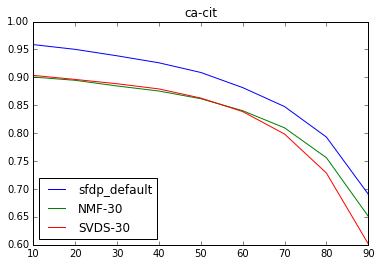

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_cacit["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_cacit["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_cacit["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=3)
plt.title('ca-cit')
plt.show()

# Latex

In [12]:
def print_latex_table(k, auc):
    # SFDP & PA & CN & AA & NMF-30 & SVDS-30
    line = ''
    line += print_latex_line(auc["auc_sfdp_default"][k/10]) + '&'
    line += print_latex_line(auc["auc_PA"][k/10]) + '&'
    line += print_latex_line(auc["auc_CN"][k/10]) + '&'
    line += print_latex_line(auc["auc_AA"][k/10]) + '&'
    line += print_latex_line(auc["auc_NMF_30"][k/10]) + '&'
    line += print_latex_line(auc["auc_SVDS_30"][k/10]) + '\\\\  \hline'
    print line
    

line_facebook = """file:data/structral/facebook/train.in N: 30 k: 10 gap:0 verbose:False directed:False bipartite:False max_iter:25p: 2sparse: False
NMF-10 : 0.910311 (+/- 0.002795)
svds-30 : 0.916859 (+/- 0.001494)
PA : 0.878891 (+/- 0.001117)
CN : 0.909232 (+/- 0.000781)
Adamic-Adar : 0.909540 (+/- 0.000795)
NMF-30 : 0.927333 (+/- 0.001262)
svds-10 : 0.905818 (+/- 0.001093)
sfdp-default : 0.910233 (+/- 0.000809)"""

line_reactome = """file:data/structral/reactome/train.in N: 30 k: 10 gap:0 verbose:False directed:False bipartite:False max_iter:25p: 2sparse: False
NMF-10 : 0.945959 (+/- 0.007664)
svds-30 : 0.974206 (+/- 0.001257)
PA : 0.899646 (+/- 0.001078)
CN : 0.984065 (+/- 0.001216)
Adamic-Adar : 0.984908 (+/- 0.001210)
NMF-30 : 0.975485 (+/- 0.001678)
svds-10 : 0.947680 (+/- 0.001567)
sfdp-default : 0.967696 (+/- 0.001250)"""

line_cahelp = """file:data/structral/Ca-HelpTh/train.in N: 30 k: 10 gap:0 verbose:False directed:False bipartite:False max_iter:0p: 2sparse: False
NMF-10 : 0.822846 (+/- 0.004562)
svds-30 : 0.888617 (+/- 0.003917)
PA : 0.772922 (+/- 0.003598)
CN : 0.904594 (+/- 0.002813)
Adamic-Adar : 0.904854 (+/- 0.002763)
NMF-30 : 0.884616 (+/- 0.004783)
svds-10 : 0.824843 (+/- 0.005331)
sfdp-default : 0.938674 (+/- 0.003299)"""

auc_facebook = extract_data(line_facebook, True)
auc_rectome = extract_data(line_reactome, True)
auc_cahelp = extract_data(line_cahelp, True)
auc_power_grid = extract_data('PowerGrid_logs.txt')
auc_euroroad = extract_data('Euroroad_logs.txt')
auc_airport = extract_data('Airport_logs.txt')

print_latex_table(10, auc_power_grid)
print_latex_table(30, auc_airport)
print_latex_table(10, auc_euroroad)
print_latex_table(30, auc_facebook)
print_latex_table(30, auc_rectome)
print_latex_table(30, auc_cahelp)


 0.9$\pm$0.02 & 0.56$\pm$0.03 & 0.61$\pm$0.01 & 0.61$\pm$0.01 & 0.81$\pm$0.03 & 0.78$\pm$0.05 \\  \hline
 0.94$\pm$0.0 & 0.94$\pm$0.0 & 0.96$\pm$0.0 & 0.96$\pm$0.0 & 0.97$\pm$0.0 & 0.94$\pm$0.01 \\  \hline
 0.79$\pm$0.08 & 0.38$\pm$0.06 & 0.53$\pm$0.02 & 0.53$\pm$0.02 & 0.67$\pm$0.08 & 0.62$\pm$0.11 \\  \hline
 0.91$\pm$0.0 & 0.88$\pm$0.0 & 0.91$\pm$0.0 & 0.91$\pm$0.0 & 0.93$\pm$0.0 & 0.92$\pm$0.0 \\  \hline
 0.97$\pm$0.01 & 0.9$\pm$0.01 & 0.98$\pm$0.01 & 0.98$\pm$0.01 & 0.98$\pm$0.01 & 0.97$\pm$0.01 \\  \hline
 0.94$\pm$0.0 & 0.77$\pm$0.0 & 0.9$\pm$0.0 & 0.9$\pm$0.0 & 0.88$\pm$0.0 & 0.89$\pm$0.0 \\  \hline


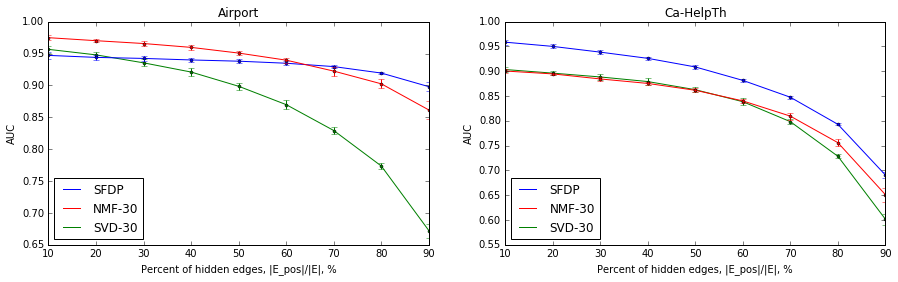

In [89]:
import matplotlib.lines as mlines

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
#plt.plot(N, get_score(auc_airport["auc_sfdp_default"]), label='sfdp_default')
#plt.plot(N, get_score(auc_airport["auc_NMF_30"]), label='NMF-30')
#plt.plot(N, get_score(auc_airport["auc_SVDS_30"]), label='SVDS-30')

def get_err(auc):
    return [ x[1] for x in auc[1:]]

plt.errorbar(N, get_score(auc_airport["auc_SVDS_30"]), yerr=get_err(auc_airport["auc_SVDS_30"])
            , fmt='-o', markersize=3, label='SVDS-30', color='green')

plt.errorbar(N, get_score(auc_airport["auc_sfdp_default"]), yerr=get_err(auc_airport["auc_sfdp_default"])
            , fmt='-o', marker='o', markersize=3, label='sfdp_default', color='blue')
plt.errorbar(N, get_score(auc_airport["auc_NMF_30"]),yerr=get_err(auc_airport["auc_NMF_30"])
            , fmt='-o', marker='o', markersize=3, label='NMF-30', color='red')

plt.xlabel('Percent of hidden edges, |E_pos|/|E|, %')
plt.ylabel('AUC')

sfdp = mlines.Line2D([], [], color='blue')
nmf = mlines.Line2D([], [], color='red')
svd = mlines.Line2D([], [], color='green')
plt.legend([sfdp, nmf, svd], ["SFDP", "NMF-30", "SVD-30"], fontsize = 'large', loc=3)

plt.title('Airport')

plt.subplot(1,2,2)


plt.errorbar(N, get_score(auc_cacit["auc_SVDS_30"]), yerr=get_err(auc_airport["auc_SVDS_30"])
            , fmt='-o', markersize=3, label='SVDS-30', color='green')

plt.errorbar(N, get_score(auc_cacit["auc_sfdp_default"]), yerr=get_err(auc_airport["auc_sfdp_default"])
            , fmt='-o', marker='o', markersize=3, label='sfdp_default', color='blue')
plt.errorbar(N, get_score(auc_cacit["auc_NMF_30"]),yerr=get_err(auc_airport["auc_NMF_30"])
            , fmt='-o', marker='o', markersize=3, label='NMF-30', color='red')

sfdp = mlines.Line2D([], [], color='blue')
nmf = mlines.Line2D([], [], color='red')
svd = mlines.Line2D([], [], color='green')

plt.xlabel('Percent of hidden edges, |E_pos|/|E|, %')
plt.ylabel('AUC')
plt.legend([sfdp, nmf, svd], ["SFDP", "NMF-30", "SVD-30"], fontsize = 'large', loc=3)
plt.title('Ca-HelpTh')


In [67]:
auc_cacit_1 = extract_data('Ca-HelpTh_p_1.txt')
print auc_cacit_1

{'auc_directed': [None, None, None, None, None, None, None, None, None, None], 'auc_sfdp_default': [None, [0.95644, 0.00517], [0.948911, 0.0033], None, [0.924091, 0.004006], [0.907183, 0.003912], [0.882499, 0.002649], [0.845156, 0.004375], [0.789799, 0.003723], [0.695157, 0.004146]], 'auc_SVDS_10': [None, [0.83359, 0.011895], [0.829106, 0.006253], None, [0.821723, 0.006], [0.816354, 0.004199], [0.805948, 0.006551], [0.78777, 0.006118], [0.739821, 0.014671], [0.627568, 0.023198]], 'auc_NMF_30': [None, [0.899512, 0.007223], [0.891433, 0.004639], None, [0.875835, 0.002776], [0.86213, 0.006314], [0.842179, 0.008376], [0.810229, 0.006786], [0.758874, 0.009272], [0.648465, 0.009627]], 'auc_AA': [None, [0.928554, 0.002764], [0.919494, 0.003414], None, [0.880178, 0.003135], [0.845116, 0.002293], [0.793933, 0.004352], [0.724212, 0.000945], [0.638747, 0.002094], [0.550237, 0.002866]], 'auc_bipartite': [None, None, None, None, None, None, None, None, None, None], 'auc_PA': [None, [0.778085, 0.010

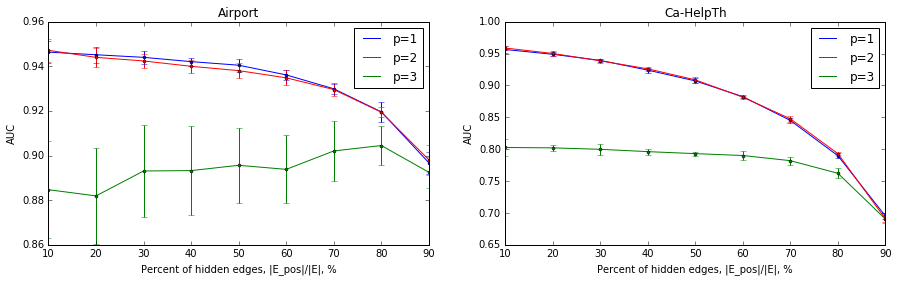

In [104]:
def get_score(auc):
    r = []
    for x in auc[1:]:
        if x:
            r.append(x[0])
        else:
            r.append(0)
    return r


auc_cacit = extract_data('Ca-HelpTh.txt')
auc_cacit_1 = extract_data('Ca-HelpTh_p_1.txt')
auc_cacit_3 = extract_data('Ca-HelpTh_p3.txt')

auc_airport = extract_data('Airport_logs.txt')
auc_airport_1 = extract_data('Airport_p_1.txt')
auc_airport_3 = extract_data('Airportp3.txt')

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)

plt.errorbar(N, get_score(auc_airport_3["auc_sfdp_default"]), yerr=get_err(auc_airport_3["auc_sfdp_default"])
            , fmt='-o', markersize=3, label='SVDS-30', color='green')

plt.errorbar(N, get_score(auc_airport_1["auc_sfdp_default"]), yerr=get_err(auc_airport_1["auc_sfdp_default"])
            , fmt='-o', marker='o', markersize=3, label='sfdp_default', color='blue')
plt.errorbar(N, get_score(auc_airport["auc_sfdp_default"]),yerr=get_err(auc_airport["auc_sfdp_default"])
            , fmt='-o', marker='o', markersize=3, label='NMF-30', color='red')

p1 = mlines.Line2D([], [], color='blue')
p2 = mlines.Line2D([], [], color='red')
p3 = mlines.Line2D([], [], color='green')

plt.xlabel('Percent of hidden edges, |E_pos|/|E|, %')
plt.ylabel('AUC')
plt.legend([p1, p2, p3], ["p=1", "p=2", "p=3"], fontsize = 'large', loc=1)

plt.title('Airport')

plt.subplot(1,2,2)

plt.errorbar(N, get_score(auc_cacit_3["auc_sfdp_default"]), yerr=get_err(auc_cacit_3["auc_sfdp_default"])
            , fmt='-o', markersize=3, label='SVDS-30', color='green')

plt.errorbar(N, get_score(auc_cacit_1["auc_sfdp_default"]), yerr=get_err(auc_cacit_1["auc_sfdp_default"])
            , fmt='-o', marker='o', markersize=3, label='sfdp_default', color='blue')
plt.errorbar(N, get_score(auc_cacit["auc_sfdp_default"]),yerr=get_err(auc_cacit["auc_sfdp_default"])
            , fmt='-o', marker='o', markersize=3, label='NMF-30', color='red')

p1 = mlines.Line2D([], [], color='blue')
p2 = mlines.Line2D([], [], color='red')
p3 = mlines.Line2D([], [], color='green')

plt.xlabel('Percent of hidden edges, |E_pos|/|E|, %')
plt.ylabel('AUC')
plt.legend([p1, p2, p3], ["p=1", "p=2", "p=3"], fontsize = 'large', loc=1)

plt.title('Ca-HelpTh')

plt.show()

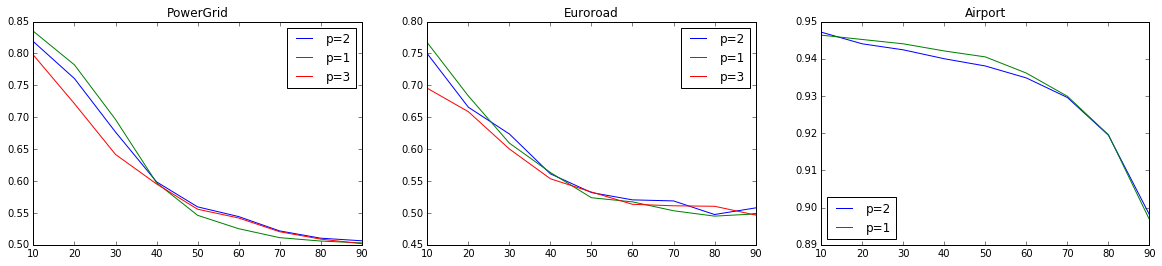

In [65]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,3)
plt.plot(N, get_score(auc_airport["auc_sfdp_default"]), label='p=2')
plt.plot(N, get_score(auc_airport_1["auc_sfdp_default"]), label='p=1')

plt.legend(loc=3)
plt.title('Airport')

plt.subplot(1,3,2)
plt.plot(N, get_score(auc_euroroad["auc_sfdp_default"]), label='p=2')
plt.plot(N, get_score(auc_euroroad_1["auc_sfdp_default"]), label='p=1')
plt.plot(N, get_score(auc_euroroad_3["auc_sfdp_default"]), label='p=3')
plt.legend(loc=1)
plt.title('Euroroad')

plt.subplot(1,3,1)
plt.plot(N, get_score(auc_power_grid["auc_sfdp_default"]), label='p=2')
plt.plot(N, get_score(auc_power_grid_1["auc_sfdp_default"]), label='p=1')
plt.plot(N, get_score(auc_power_grid_3["auc_sfdp_default"]), label='p=3')

plt.legend(loc=1)
plt.title('PowerGrid')
plt.show()

# Directed

In [77]:

def print_latex_table_directed(k, auc):
    # Bi-SFDP & SFDP & NMF-30 & SVDS-30
    line = ''
    line += print_latex_line(auc["auc_directed"][k/10], 3) + '&'
    line += print_latex_line(auc["auc_sfdp_default"][k/10], 3) + '&'
    line += print_latex_line(auc["auc_NMF_30"][k/10], 3) + '&'
    line += print_latex_line(auc["auc_SVDS_30"][k/10], 3) + '\\\\  \hline'
    print line

In [78]:
line = """file:data/directed/cit-HepTh/train.in N: 30 k: 10 gap:0 verbose:False directed:True bipartite:False max_iter:25p:2
NMF-10 : 0.808980 (+/- 0.001689)
svds-30 : 0.819458 (+/- 0.001612)
PA : 0.541131 (+/- 0.002693)
CN : 0.505561 (+/- 0.000714)
Adamic-Adar : 0.505572 (+/- 0.000717)
sfdp-directed : 0.833927 (+/- 0.011028)
NMF-30 : 0.819128 (+/- 0.002929)
svds-10 : 0.810075 (+/- 0.001207)
sfdp-default : 0.814425 (+/- 0.003251)"""

line_g = """file:data/directed/ego-gplus/train.in N: 30 k: 10 gap:0 verbose:False directed:True bipartite:False max_iter:25p:2
NMF-10 : 0.736458 (+/- 0.004902)
svds-30 : 0.657987 (+/- 0.011933)
PA : 0.510365 (+/- 0.009603)
CN : 0.509947 (+/- 0.002712)
Adamic-Adar : 0.510001 (+/- 0.002711)
sfdp-directed : 0.842734 (+/- 0.028342)
NMF-30 : 0.689966 (+/- 0.013049)
svds-10 : 0.717287 (+/- 0.005972)
sfdp-default : 0.775500 (+/- 0.005364)"""

line_t = """file:data/directed/ego-twitter/train.in N: 30 k: 10 gap:0 verbose:False directed:True bipartite:False max_iter:25p:2
NMF-10 : 0.681783 (+/- 0.005706)
svds-30 : 0.669102 (+/- 0.007080)
PA : 0.500746 (+/- 0.004502)
CN : 0.510429 (+/- 0.001466)
Adamic-Adar : 0.510434 (+/- 0.001465)
sfdp-directed : 0.758950 (+/- 0.039955)
NMF-30 : 0.677939 (+/- 0.006048)
svds-10 : 0.678128 (+/- 0.008806)
sfdp-default : 0.717397 (+/- 0.006382)"""

auc_cit_HepTh = extract_data(line, True)
auc_google = extract_data(line_g, True)
auc_twitter = extract_data(line_t, True)

In [79]:
print_latex_table_directed(30, auc_cit_HepTh)
print_latex_table_directed(30, auc_google)
print_latex_table_directed(30, auc_twitter)

 0.834$\pm$0.002 & 0.814$\pm$0.002 & 0.819$\pm$0.002 & 0.819$\pm$0.002 \\  \hline
 0.843$\pm$0.005 & 0.775$\pm$0.005 & 0.69$\pm$0.005 & 0.658$\pm$0.005 \\  \hline
 0.759$\pm$0.006 & 0.717$\pm$0.006 & 0.678$\pm$0.006 & 0.669$\pm$0.006 \\  \hline


# Bipartite

In [94]:
def print_latex_table_biparite(k, auc):
    # Bi-SFDP & SFDP & PA &  NMF-30 &  SVDS-30
    line = ''
    line += print_latex_line(auc["auc_bipartite"][k/10], 3) + '&'
    line += print_latex_line(auc["auc_sfdp_default"][k/10], 3) + '&'
    line += print_latex_line(auc["auc_PA"][k/10], 3) + '&'
    line += print_latex_line(auc["auc_NMF_30"][k/10], 3) + '&'
    line += print_latex_line(auc["auc_SVDS_30"][k/10], 3) + '\\\\  \hline'
    print line

In [95]:
line_condmat = """file:data/bipartite/condmat/train.in N: 30 k: 10 gap:0 verbose:False directed:False bipartite:True max_iter:0p:2
NMF-10 : 0.582597 (+/- 0.009017)
svds-30 : 0.646288 (+/- 0.014982)
PA : 0.575246 (+/- 0.004739)
CN : 0.500000 (+/- 0.000000)
Adamic-Adar : 0.500000 (+/- 0.000000)
NMF-30 : 0.615734 (+/- 0.004445)
svds-10 : 0.597678 (+/- 0.005206)
sfdp-bipartite : 0.611895 (+/- 0.000000)
sfdp-default : 0.698280 (+/- 0.006323)
"""

line_frwiki = """file:data/bipartite/frwikinews/train.in N: 30 k: 10 gap:0 verbose:False directed:False bipartite:True max_iter:0p:2
NMF-10 : 0.696214 (+/- 0.030957)
svds-30 : 0.613425 (+/- 0.011517)
PA : 0.812840 (+/- 0.005076)
CN : 0.500000 (+/- 0.000000)
Adamic-Adar : 0.500000 (+/- 0.000000)
NMF-30 : 0.607015 (+/- 0.030262)
svds-10 : 0.747541 (+/- 0.009120)
sfdp-bipartite : 0.811112 (+/- 0.000000)
sfdp-default : 0.744149 (+/- 0.006823)"""

line_movielens = """file:data/bipartite/movielens/train.in N: 30 k: 10 gap:0 verbose:False directed:False bipartite:True max_iter:0p:2
NMF-10 : 0.924980 (+/- 0.000701)
svds-30 : 0.940871 (+/- 0.000516)
PA : 0.902563 (+/- 0.000680)
CN : 0.500000 (+/- 0.000000)
Adamic-Adar : 0.500000 (+/- 0.000000)
NMF-30 : 0.941359 (+/- 0.001424)
svds-10 : 0.927220 (+/- 0.000611)
sfdp-bipartite : 0.887031 (+/- 0.000000)
sfdp-default : 0.840992 (+/- 0.005297)"""

auc_condmat = extract_data(line_condmat, True)
auc_frwiki = extract_data(line_frwiki, True)
auc_movielens = extract_data(line_movielens, True)

In [96]:
print_latex_table_biparite(30, auc_condmat)
print_latex_table_biparite(30, auc_frwiki)
print_latex_table_biparite(30, auc_movielens)

 0.612$\pm$0.009 & 0.698$\pm$0.009 & 0.575$\pm$0.009 & 0.616$\pm$0.009 & 0.646$\pm$0.009 \\  \hline
 0.811$\pm$0.031 & 0.744$\pm$0.031 & 0.813$\pm$0.031 & 0.607$\pm$0.031 & 0.613$\pm$0.031 \\  \hline
 0.887$\pm$0.001 & 0.841$\pm$0.001 & 0.903$\pm$0.001 & 0.941$\pm$0.001 & 0.941$\pm$0.001 \\  \hline


In [ ]:
import cross_validation

files = [
    'data/structral/Ca-HelpTh/train.in',
]

for file in files:
    for N in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
        cross_validation.cross_validation(file, N, 10)

# Undirected

In [2]:

line_facebook = """file:data/structral/facebook/train.in N: 30 k: 10 gap:0 verbose:False directed:False bipartite:False max_iter:25p: 2sparse: False
NMF-10 : 0.910311 (+/- 0.002795)
svds-30 : 0.916859 (+/- 0.001494)
PA : 0.878891 (+/- 0.001117)
CN : 0.909232 (+/- 0.000781)
Adamic-Adar : 0.909540 (+/- 0.000795)
NMF-30 : 0.927333 (+/- 0.001262)
svds-10 : 0.905818 (+/- 0.001093)
sfdp-default : 0.910233 (+/- 0.000809)"""

auc_facebook = extract_data(line_facebook, True)

NameError: name 'extract_data' is not defined